___
# Projeto 3 - CD
___

## Regressão linear que agrupa diferentes tipos de músicas de acordo com sua dançabilidade.

O objetivo desse projeto é fazer diferentes agrupamentos de músicas do Spotify, utilizando a regressão linear, levando em consideração o quão dançável é a música. Queremos analisar o tamanho obtido e as diferenças das quantidades de músicas em determinados grupos.

Exemplo de aplicação da técnica: https://www.kaggle.com/noemir/dimension-reduction-of-music-pref-in-progress/comments 

**Nomes das integrantes:**
Rebeca Moreno,
Giulia Passarelli e
Carla Kim

In [37]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

In [46]:
#lendo a planilha de dados
sptdata = pd.read_csv("data.csv")
#criando o dataframe que será usado
spotdata = pd.DataFrame()
#ajustando a quantidade de termos que precisamos usar
listamode = []
listakey = []
listadance = []
listaacousticness = []

for i in range(0,100):
    listamode.append(sptdata['mode'][i])
    listakey.append(sptdata['key'][i])
    listadance.append(sptdata['danceability'][i])
    listaacousticness.append(sptdata['acousticness'])

spotdata['mode'] = listamode
spotdata['key'] = listakey
spotdata['danceability'] = listadance
spotdata['acousticness'] = listaacousticness

Dicionário dos dados:
https://www.kaggle.com/nyartsgnaw/analyzing-gender-differences/data

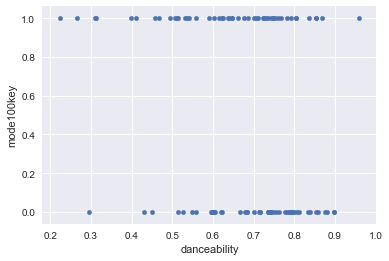

In [47]:
spotdata['mode100key'] = spotdata['mode'] + spotdata['key']
spotdata['mode100key'] = np.where(spotdata.mode100key >= spotdata['mode100key'].mean(), 1, 0)
spotdata.plot(kind = "scatter", x = "danceability", y = "mode100key")

## **Part 2:** Predicting a Categorical Response

In [48]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['danceability']
X = spotdata[feature_cols]
y = spotdata.mode100key
logreg.fit(X, y)
spotdata['mode100key_pred_class'] = logreg.predict(X)

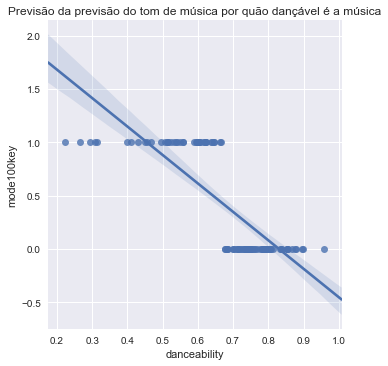

In [49]:
sns.lmplot('danceability','mode100key_pred_class',spotdata)
plt.title('Previsão da previsão do tom de música por quão dançável é a música')
plt.xlabel('danceability')
plt.ylabel('mode100key')

In [50]:
spotdata['mode100key_pred_prob'] = logreg.predict_proba(X)[:, 1]
# examine some example predictions
print(logreg.predict_proba(0.2))
print(logreg.predict_proba(0.65))
print(logreg.predict_proba(0.8))


[[ 0.18511835  0.81488165]]
[[ 0.4833674  0.5166326]]
[[ 0.59995459  0.40004541]]


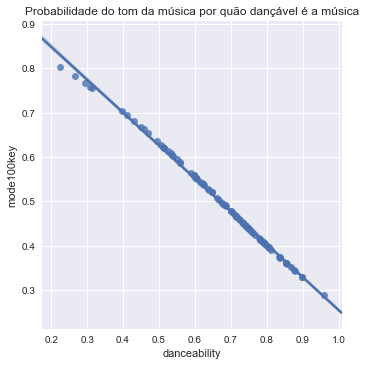

In [51]:
sns.lmplot(x = 'danceability', y='mode100key_pred_prob', data=spotdata)
plt.title('Probabilidade do tom da música por quão dançável é a música')
plt.xlabel('danceability')
plt.ylabel('mode100key')

In [52]:
# examine some example predictions
print(logreg.predict_proba(0.2))
print(logreg.predict_proba(0.5))
print(logreg.predict_proba(0.8))

[[ 0.18511835  0.81488165]]
[[ 0.36856316  0.63143684]]
[[ 0.59995459  0.40004541]]


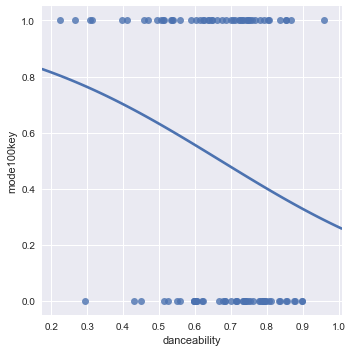

In [45]:
# create a categorical feature
glass['high_acousticness'] = np.where(spotdata.acousticness > 0.5, 1, 0)
# original (continuous) feature
sns.lmplot(x='acousticness', y='mode100key', data=spotdata, ci=None, logistic=True)